## Importing Required Packages

In [1]:
import numpy as np
import pydoop.hdfs as hd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, roc_curve, precision_recall_curve, average_precision_score

## Loading Credit Card Dataset from Hadoop using Pydoop

In [2]:
with hd.open("/user/hduser/creditcard.csv") as f:
    CreditCardData =  pd.read_csv(f, header=0)

## Reducing the number of records of Original Dataset incase we wish to work on a smaller subset of Dataset

In [3]:
ReducedData = CreditCardData.iloc[:, :]

## Shape of Credit Card Dataset, i.e. number of rows & columns present in Dataset

In [4]:
print("\nShape of Credit Card Dataset (rows, columns): " + str(ReducedData.shape))


Shape of Credit Card Dataset (rows, columns): (284807, 31)


## Removing Duplicate Records (if any)

In [5]:
FinalData = ReducedData.drop_duplicates()
print("\nShape of Credit Card Dataset after removing duplicate records (rows, columns): " + str(FinalData.shape))


Shape of Credit Card Dataset after removing duplicate records (rows, columns): (283726, 31)


## Checking for missing values

In [6]:
print("\nThe total number of missing values for each feild are:")
print(FinalData.isnull().sum())


The total number of missing values for each feild are:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Displaying Head, i.e. few starting rows of Dataset

In [7]:
print("\nHead of the dataset is:\n")
print( FinalData.head() )


Head of the dataset is:

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Cla

## Description of Dataset (Mean, Standard Deviation, Maximum, Minimum & various other values)

In [8]:
print("\nDescription of dataset is as follows:\n")
print( FinalData.describe() )


Description of dataset is as follows:

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557

## Using PCA (Principal Component Analysis) to find out two main components

In [9]:
pca = PCA(n_components=2).fit(FinalData)
pca_2d = pca.transform(FinalData)

## Plotting Reference Plot of the given Dataset using the above obtained two main components

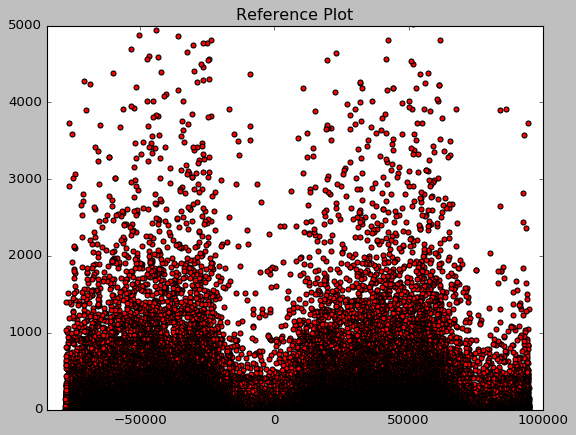

In [10]:
plt.style.use('classic')
plt.figure('Reference Plot')
plt.title('Reference Plot')                                  
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c='red')
plt.xlim([-85000, 100000])
plt.ylim([0, 5000])
plt.show()

## Using K-Means Clustering Algorithm on the Final Dataset

In [11]:
kmeans = KMeans(n_clusters=4, max_iter=5000)
kmeans.fit(FinalData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Illustrating various clusters formed after running K-Means Clustering Algorithm

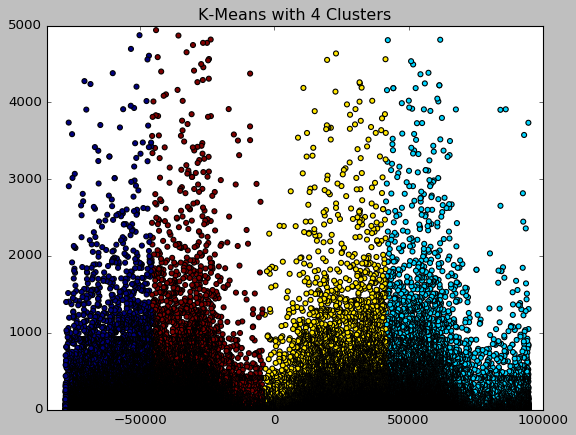

In [12]:
plt.style.use('classic')
plt.figure('K-Means with 4 Clusters')
plt.title('K-Means with 4 Clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.xlim([-85000, 100000])
plt.ylim([0, 5000])
plt.show()

## Analyzing Class Count, i.e. number of normal and fake transactions present in Dataset


Class Count:

0    283253
1       473
Name: Class, dtype: int64



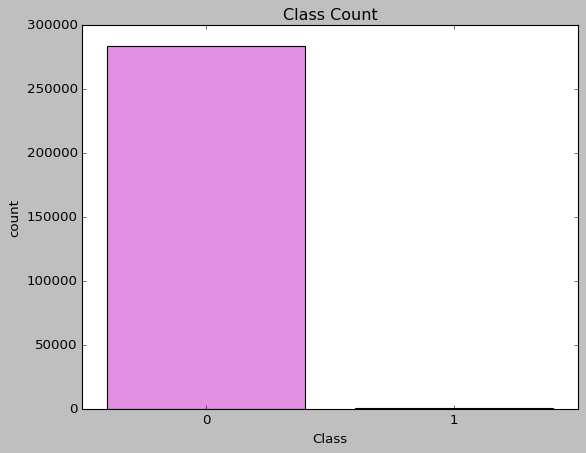

In [13]:
print("\nClass Count:\n\n" + str(FinalData['Class'].value_counts()) + "\n")

plt.style.use('classic')
plt.figure('Class Count')
plt.title('Class Count')
sbn.countplot(FinalData['Class'], color='violet')
plt.show()

## Plotting Histograms of various features V1 - V28 to determine which of them are important

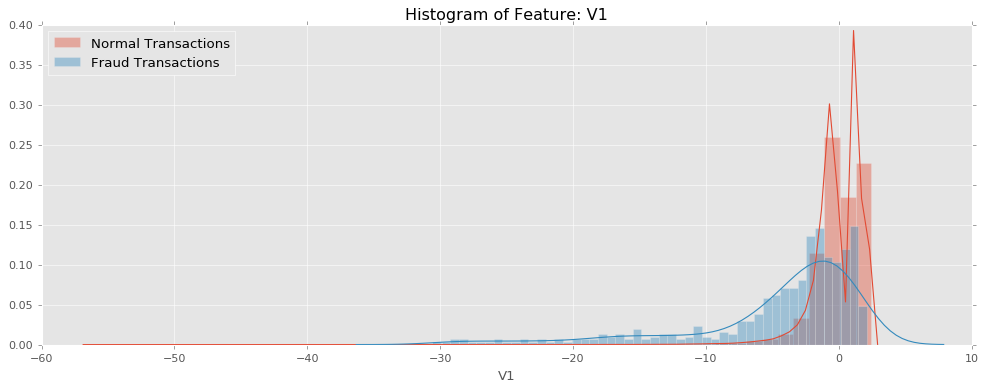

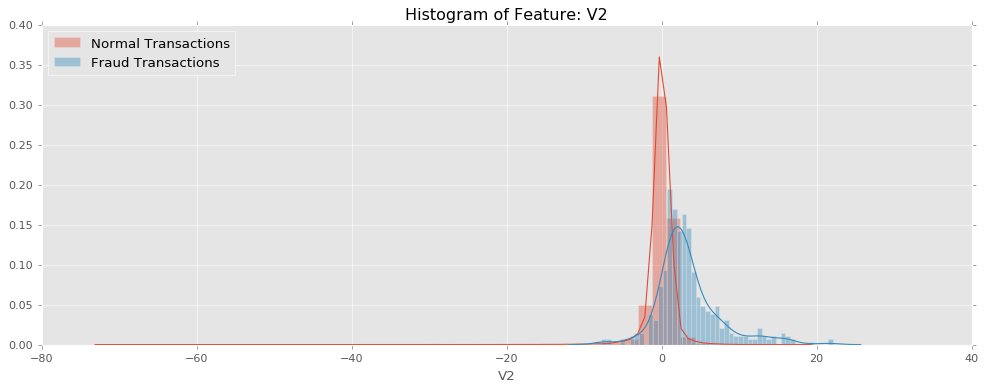

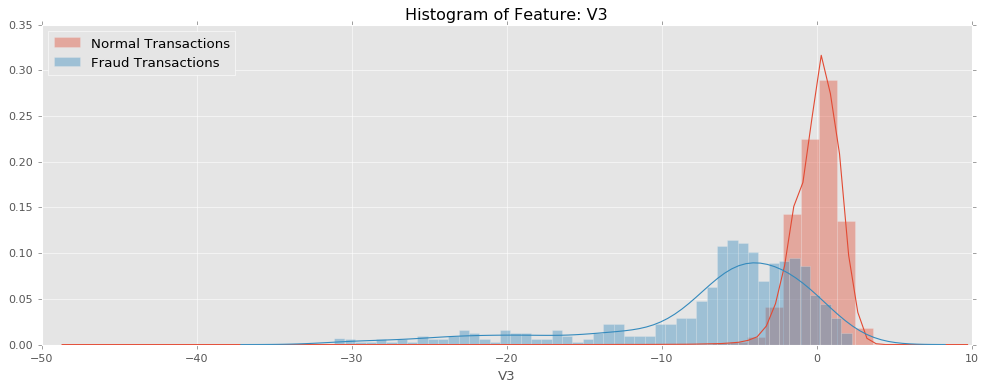

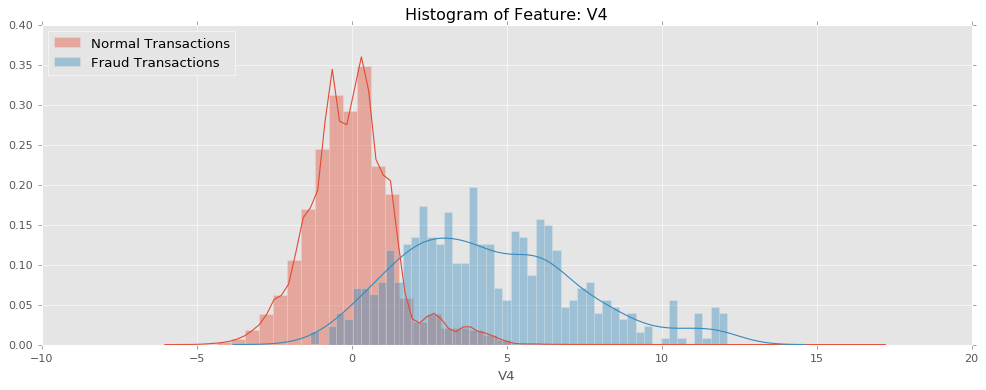

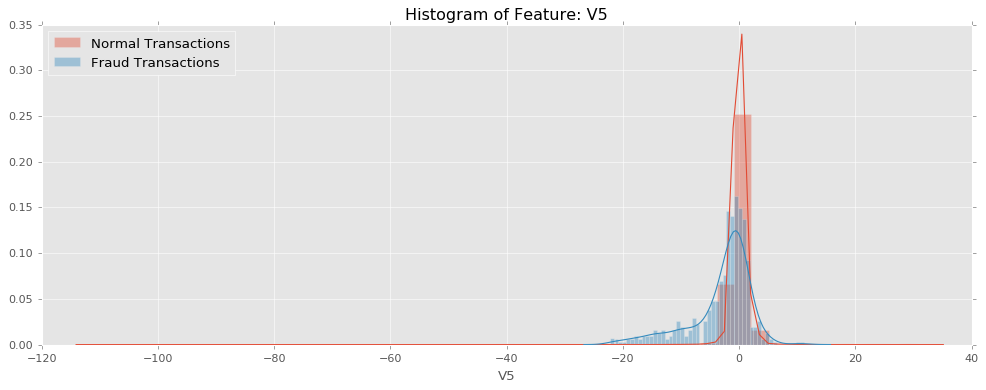

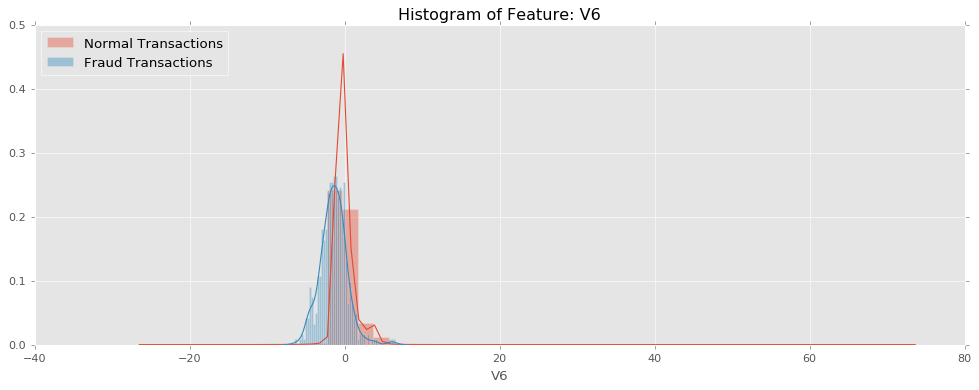

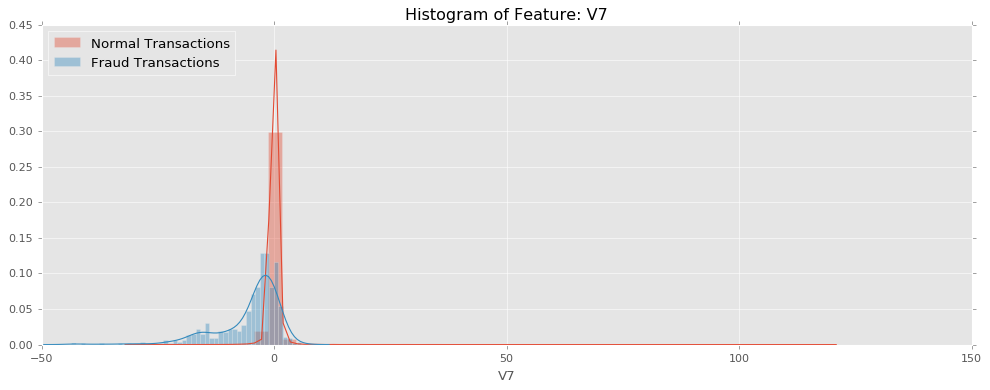

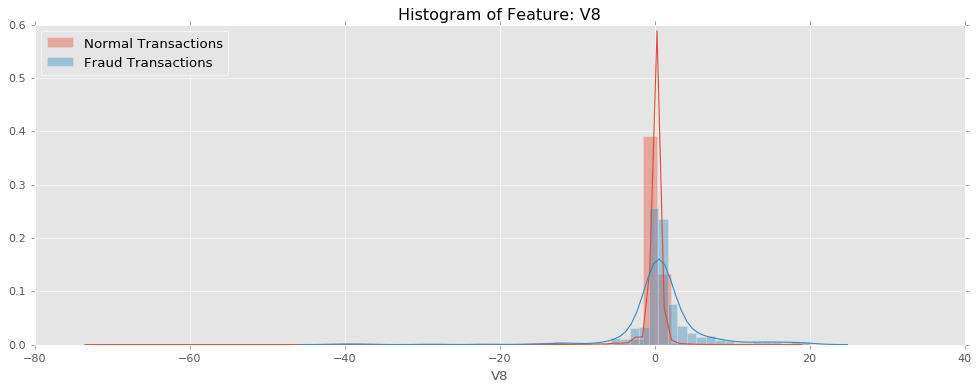

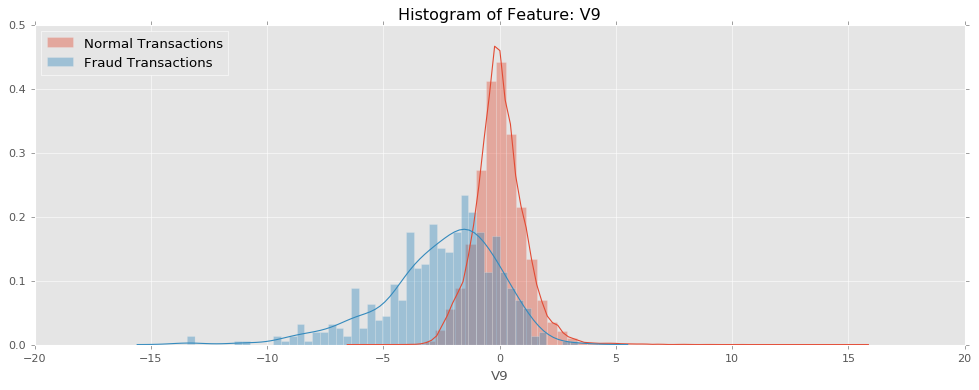

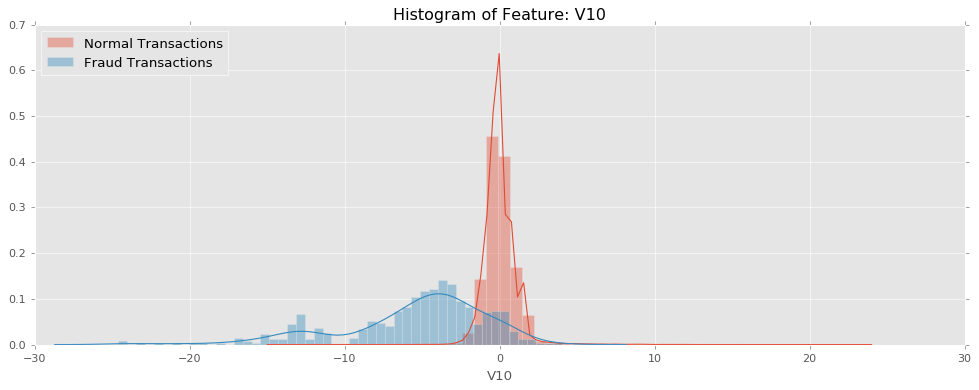

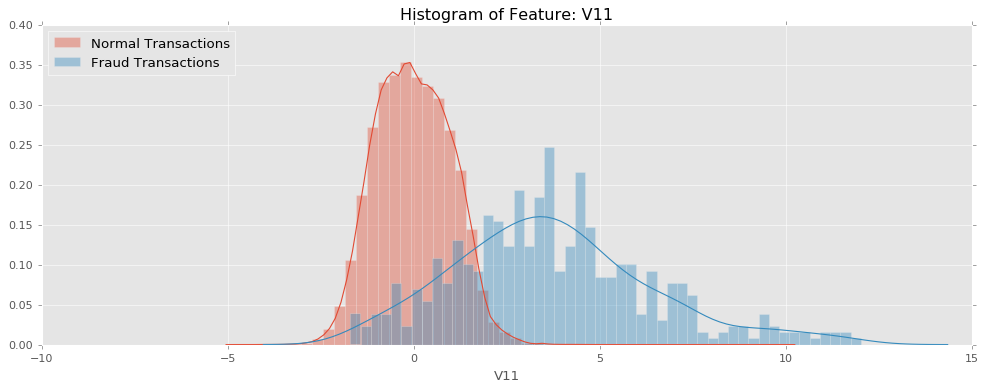

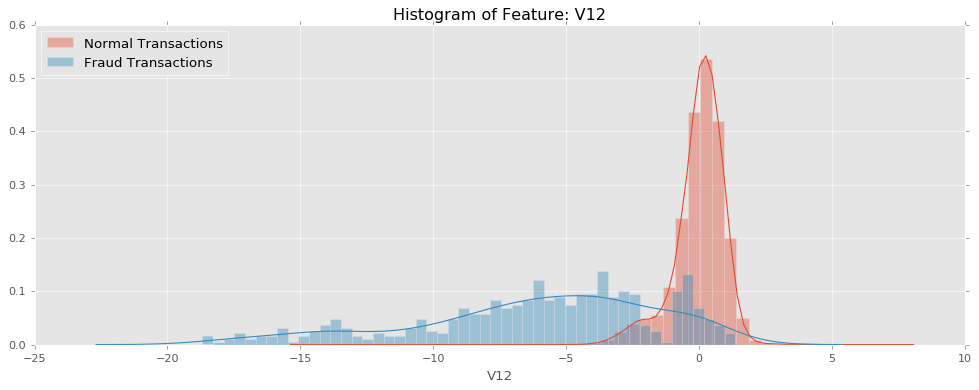

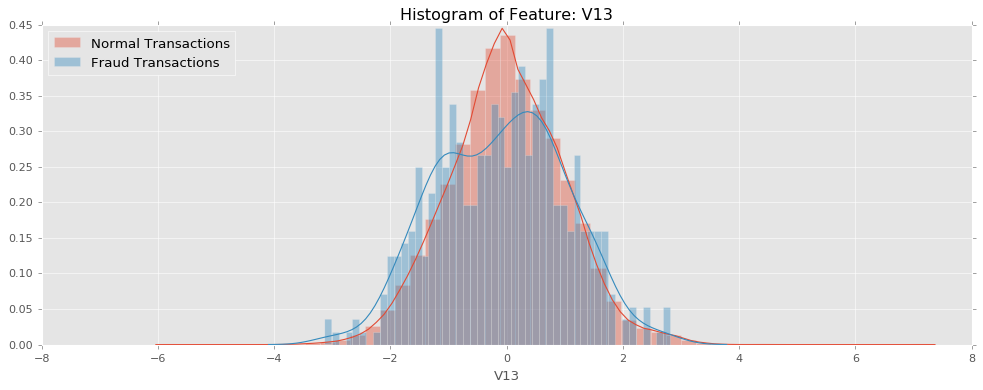

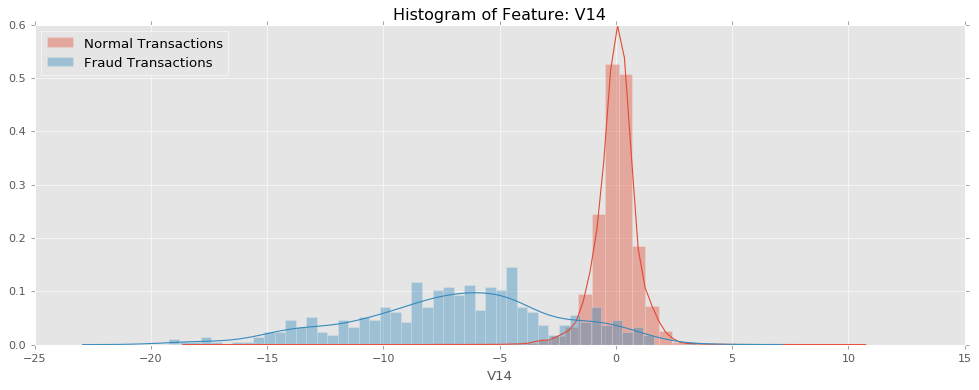

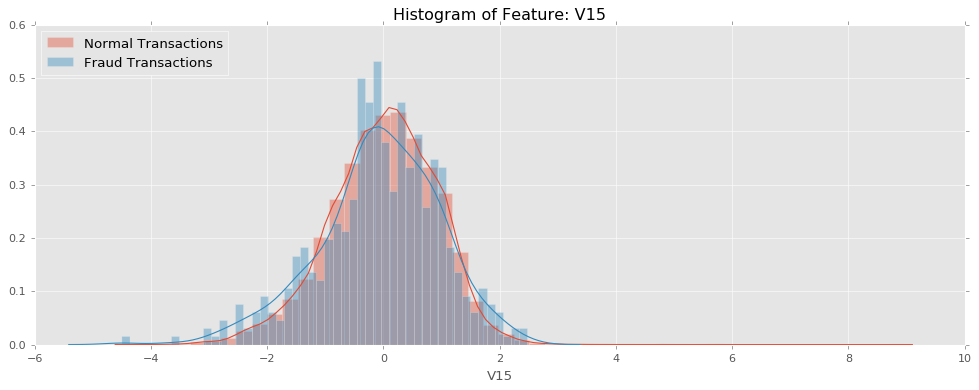

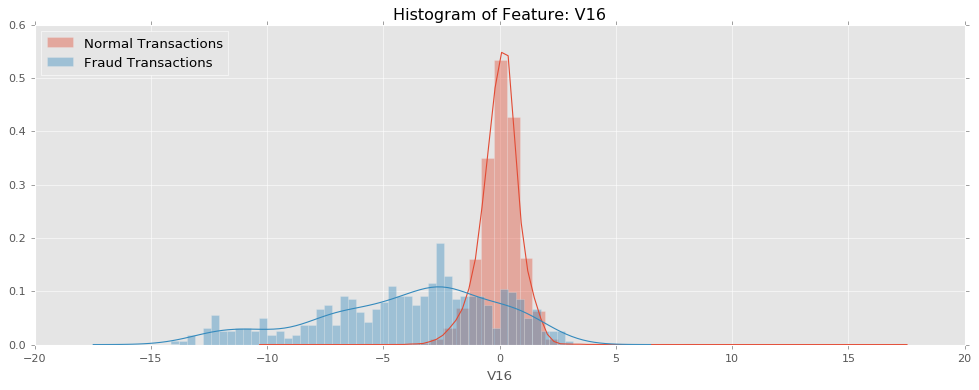

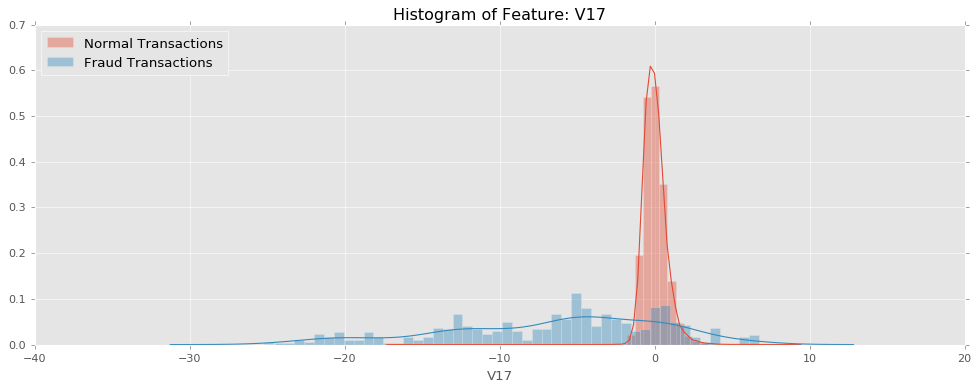

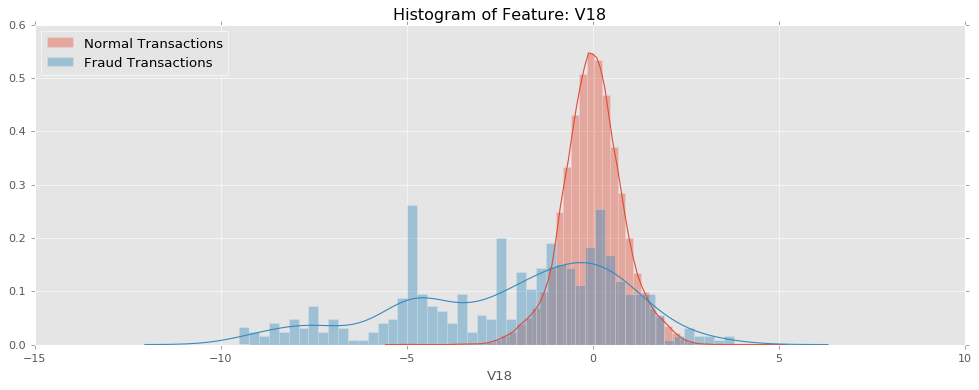

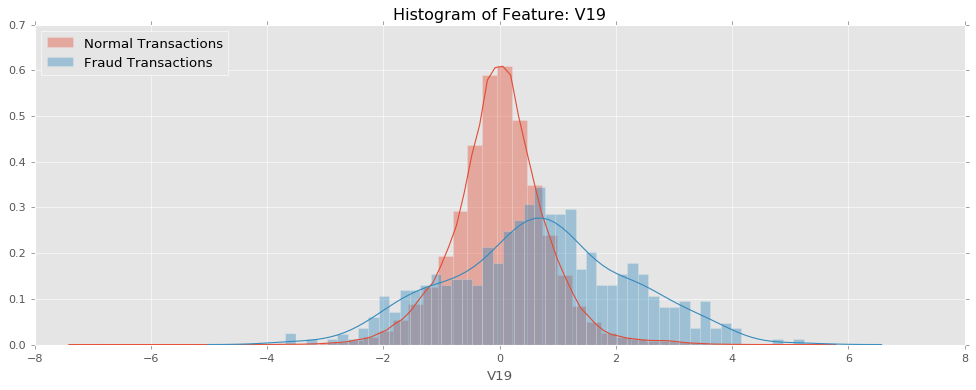

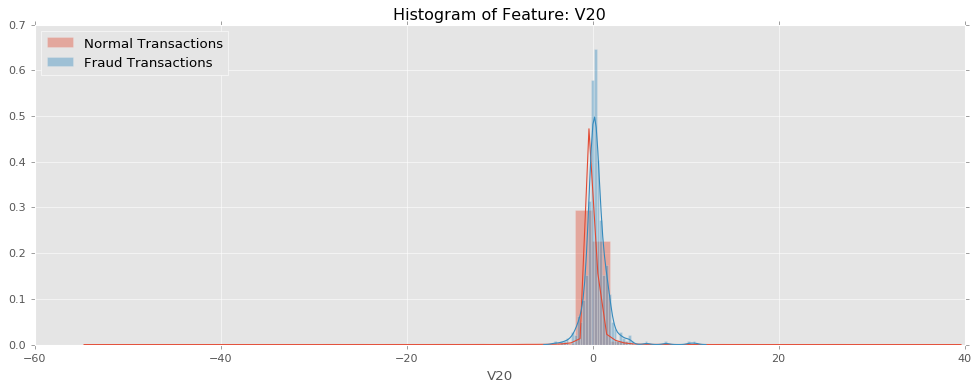

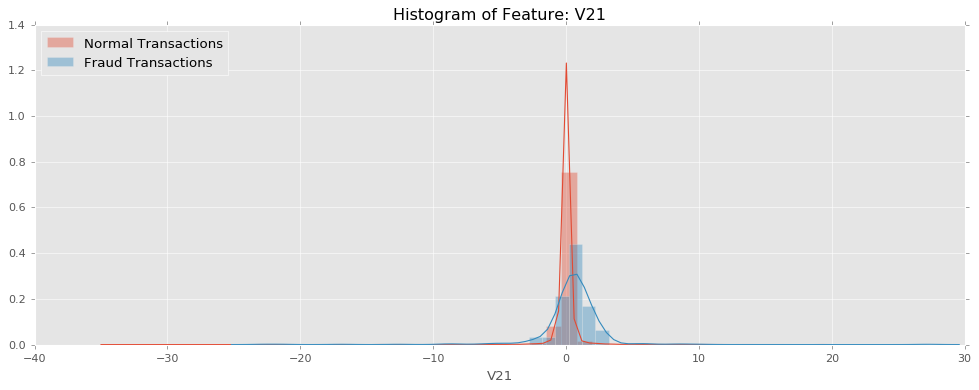

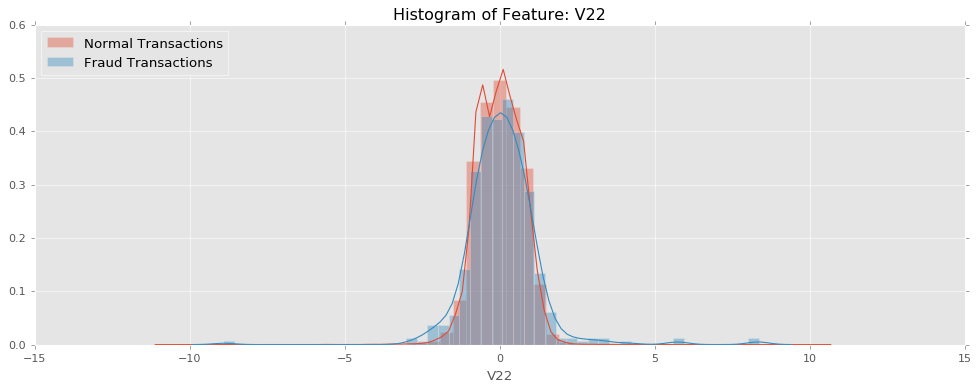

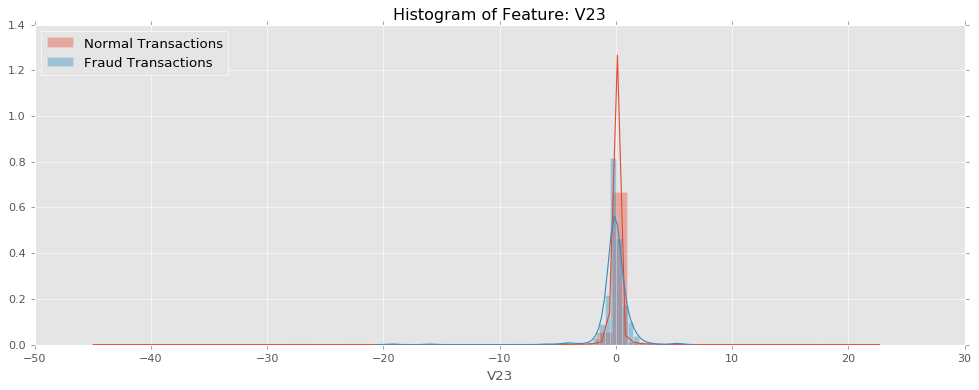

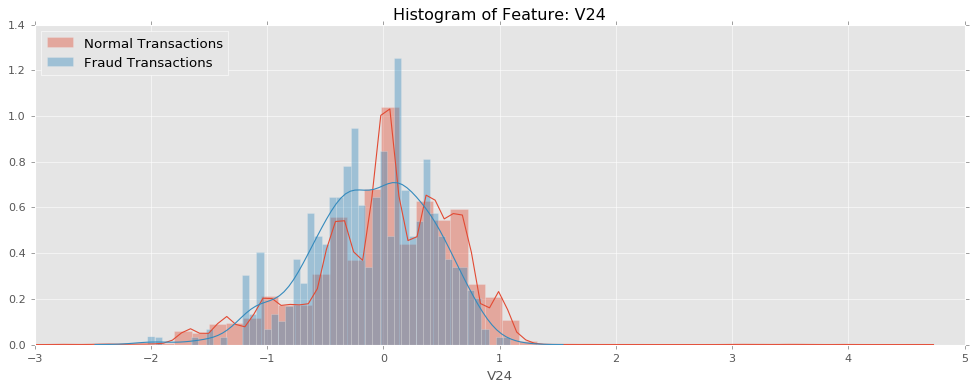

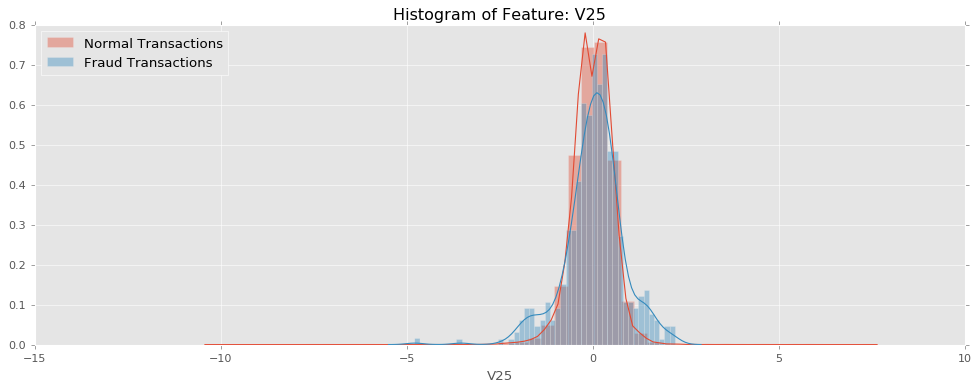

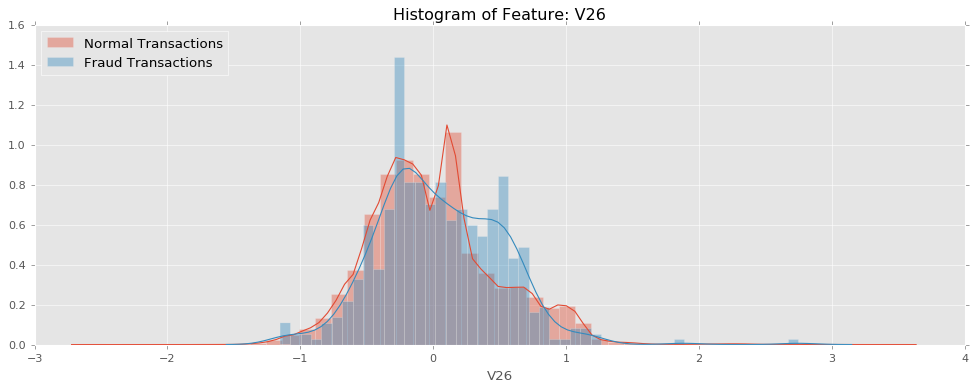

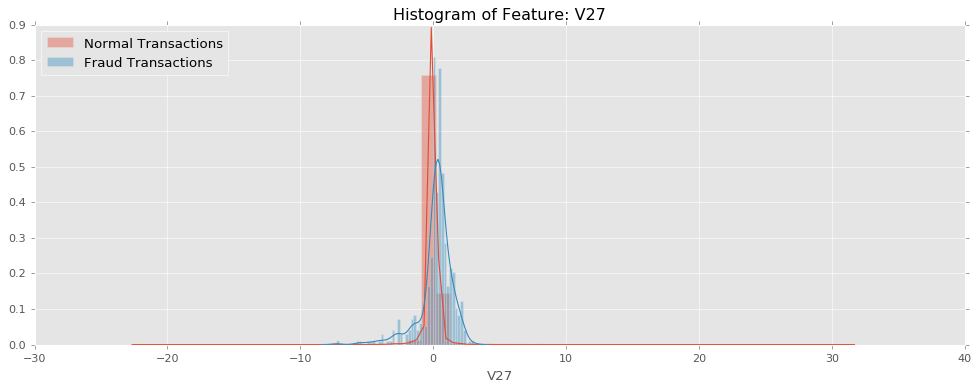

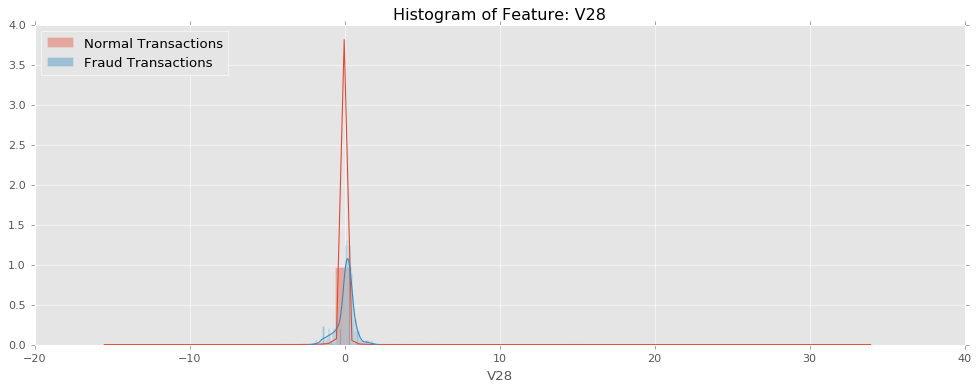

In [14]:
V_Features = FinalData.ix[:,1:29].columns

plt.style.use('ggplot')

for i, cn in enumerate(FinalData[V_Features]):
    fig, ax = plt.subplots(figsize=(15, 5))
    sbn.distplot(FinalData[cn][FinalData.Class == 0],  bins=50, label='Normal Transactions', ax = ax)
    sbn.distplot(FinalData[cn][FinalData.Class == 1],  bins=50, label='Fraud Transactions', ax = ax)
    ax.set_title('Histogram of Feature: ' + str(cn))
    plt.legend(loc='upper left')
    plt.show()

## Finding Correlation between various columns of Dataset

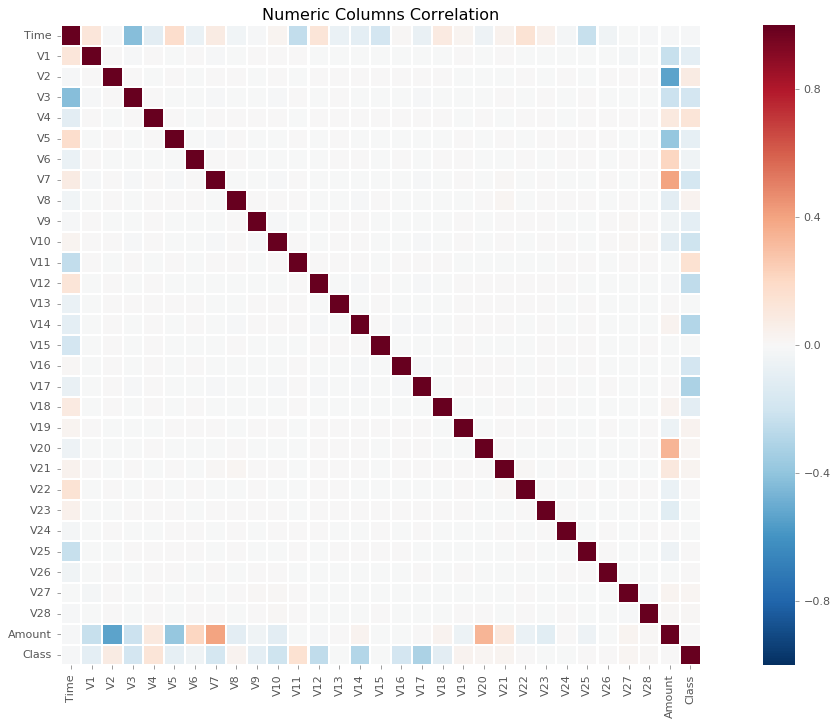

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
correlation = FinalData[FinalData.columns].corr(method='pearson')
sbn.heatmap(correlation, square=True, vmax=1, linewidths=1.0, ax=ax)
ax.set_title('Numeric Columns Correlation')
plt.show()

## Sorting various columns of Dataset on the basis of their absolute values of Coorelation with respect to Class in order to drop less important features

In [16]:
corr_dict = correlation['Class'].to_dict()

for key,val in sorted(corr_dict.items(),key=lambda x:-abs(x[1])):
    print('{0} \t : {1}'.format(key,val))

Class 	 : 1.0
V17 	 : -0.313498272957
V14 	 : -0.293375384791
V12 	 : -0.250711177206
V10 	 : -0.206971238236
V16 	 : -0.187186052846
V3 	 : -0.182322247484
V7 	 : -0.172346532441
V11 	 : 0.149067103671
V4 	 : 0.129325830727
V18 	 : -0.105339715217
V1 	 : -0.0944858337868
V9 	 : -0.0940212873128
V5 	 : -0.0878124429752
V2 	 : 0.0846244486914
V6 	 : -0.0439154092382
V19 	 : 0.0336311544423
V8 	 : 0.0330680233329
V21 	 : 0.0263574388971
V27 	 : 0.021892113307
V20 	 : 0.0214863403211
Time 	 : -0.0123593398381
V28 	 : 0.00968242633005
V24 	 : -0.00721012512073
V23 	 : -0.00633321064304
Amount 	 : 0.0057770196705
V22 	 : 0.00488723216384
V26 	 : 0.00426457679126
V13 	 : -0.00389695511144
V15 	 : -0.00329955787115
V25 	 : 0.00320249353012


## List of features to be dropped

In [17]:
drop_columns = ['V25','V15', 'V13', 'V26', 'V22', 'Amount', 'V23', 'V24', 'V28', 'Time', 'V20', 'V27', 'V21']

## Splitting the Dataset into train data and test

In [18]:
FinalData.insert(len(FinalData.columns),'Cluster', kmeans.labels_)

TrainData, TestData = train_test_split(FinalData, test_size=0.25)

TrainData = TrainData.drop(drop_columns, 1)

TestData = TestData.drop(drop_columns, 1)
TestData_matrix = TestData.as_matrix()

In [19]:
Cluster1 = TrainData[TrainData['Cluster'] == 0].as_matrix()
Cluster2 = TrainData[TrainData['Cluster'] == 1].as_matrix()
Cluster3 = TrainData[TrainData['Cluster'] == 2].as_matrix()
Cluster4 = TrainData[TrainData['Cluster'] == 3].as_matrix()

columns = len(TrainData.columns)
TestData_columns = range(0, columns)
TestData_columns.remove(columns-2)

x_Cluster1 = Cluster1[ : , range(0, columns-2)]
y_Cluster1 = Cluster1[ : , columns-2]

x_Cluster2 = Cluster2[ : , range(0, columns-2)]
y_Cluster2 = Cluster2[ : , columns-2]

x_Cluster3 = Cluster3[ : , range(0, columns-2)]
y_Cluster3 = Cluster3[ : , columns-2]

x_Cluster4 = Cluster4[ : , range(0, columns-2)]
y_Cluster4 = Cluster4[ : , columns-2]

test_x_Cluster = TestData_matrix[ : , TestData_columns]
test_x = TestData_matrix[ : , range(0, columns-2)]
test_y = TestData_matrix[ : , columns-2]

## Using Random Forest Classifier to create our classification model

In [20]:
reg_model_Cluster1 = RandomForestClassifier(criterion='entropy', max_features="auto", n_estimators=200, n_jobs=-1, oob_score=True).fit(x_Cluster1, y_Cluster1)
reg_model_Cluster2 = RandomForestClassifier(criterion='entropy', max_features="auto", n_estimators=200, n_jobs=-1, oob_score=True).fit(x_Cluster2, y_Cluster2)
reg_model_Cluster3 = RandomForestClassifier(criterion='entropy', max_features="auto", n_estimators=200, n_jobs=-1, oob_score=True).fit(x_Cluster3, y_Cluster3)
reg_model_Cluster4 = RandomForestClassifier(criterion='entropy', max_features="auto", n_estimators=200, n_jobs=-1, oob_score=True).fit(x_Cluster4, y_Cluster4)

## Predicting the class of test data using classification model

In [21]:
ctr = 0
predicted = []

for i in test_x_Cluster:
    if int(i[-1]) == 0 :
        predicted = np.append(predicted, reg_model_Cluster1.predict(test_x[ctr].reshape(1, -1))) 
    elif int(i[-1]) == 1 :
        predicted = np.append(predicted, reg_model_Cluster2.predict(test_x[ctr].reshape(1, -1))) 
    elif int(i[-1]) == 2 :
        predicted = np.append(predicted, reg_model_Cluster3.predict(test_x[ctr].reshape(1, -1))) 
    else:
        predicted = np.append(predicted, reg_model_Cluster4.predict(test_x[ctr].reshape(1, -1))) 
    ctr = ctr + 1

## Analysing Classification model using Classification report and Confusion Matrix

In [22]:
print('\nClassification Report:\n')
target_names = ['Class 0', 'Class 1']
print(metrics.classification_report(test_y, predicted, target_names=target_names))

print('\nConfusion Matrix:\n')
print(metrics.confusion_matrix(test_y, predicted))


Classification Report:

             precision    recall  f1-score   support

    Class 0       1.00      1.00      1.00     70805
    Class 1       0.97      0.77      0.86       127

avg / total       1.00      1.00      1.00     70932


Confusion Matrix:

[[70802     3]
 [   29    98]]


# Determining Accuracy of the Classification model


Accuracy = 0.9995

Area Under the Receiver Operating Characteristic Curve (AUC) = 0.8858


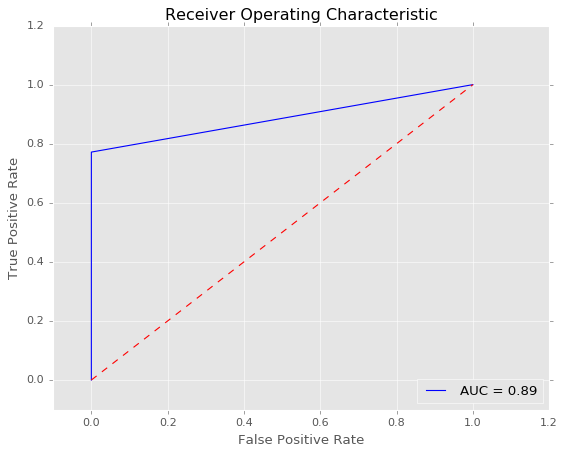

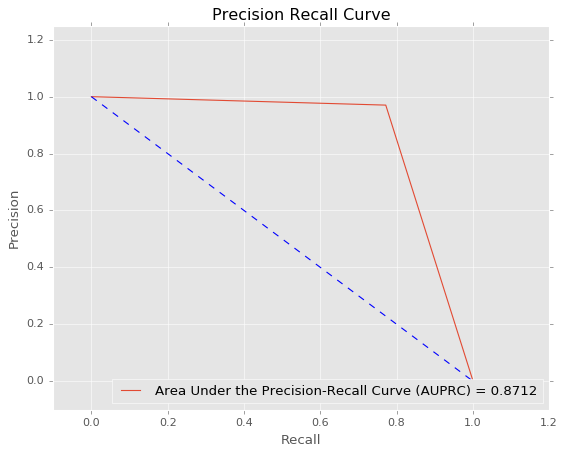

In [23]:
'''
Receiver Operating Characteristics (ROC) Curve:
An ROC curve is a commonly used way to visualize the performance of a binary classifier, meaning a classifier with two 
possible output classes.

Area Under the Curve (AUC):
AUC is (arguably) the best way to summarize its performance in a single number

True Positive Rate: When the actual classification is positive, how often does the classfier predict positive?
True Positive Rate = True Positives/All Positives

False Positive Rate: When the actual classification is negative, how often does the classifier incorrectly predict positive?
False Positive Rate = False Positives/All Negatives
'''
acc_score = accuracy_score(test_y, predicted)
print('\nAccuracy = %0.4f' %acc_score)

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nArea Under the Receiver Operating Characteristic Curve (AUC) = %0.4f'% roc_auc)


plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


precision, recall, thresholds = precision_recall_curve(test_y, predicted)
average_precision = average_precision_score(test_y, predicted)

plt.plot(recall, precision, label='Area Under the Precision-Recall Curve (AUPRC) = %0.4f' % average_precision)
plt.plot([0,1],[1,0],'b--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.25])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()